In [8]:
!which python
!python -V

/c/Users/jwald/Anaconda3/envs/ml_project/python
Python 3.10.6


In [9]:
!conda list

# packages in environment at C:\Users\jwald\Anaconda3\envs\ml_project:
#
# Name                    Version                   Build  Channel
anndata                   0.8.0              pyhd8ed1ab_1    conda-forge
brotli                    1.0.9                hcfcfb64_8    conda-forge
brotli-bin                1.0.9                hcfcfb64_8    conda-forge
bzip2                     1.0.8                h8ffe710_4    conda-forge
ca-certificates           2022.10.11           haa95532_0  
cached-property           1.5.2                hd8ed1ab_1    conda-forge
cached_property           1.5.2              pyha770c72_1    conda-forge
certifi                   2022.9.24       py310haa95532_0  
colorama                  0.4.6              pyhd8ed1ab_0    conda-forge
contourpy                 1.0.6           py310h232114e_0    conda-forge
cycler                    0.11.0             pyhd8ed1ab_0    conda-forge
fonttools                 4.38.0          py310h8d17308_1    conda-forge
freetype  

In [1]:
import copy
import numpy as np
import pandas as pd
import anndata as an
import scanpy as sc

import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

ModuleNotFoundError: No module named 'anndata'

In [45]:
filename = "GSE72857_accession_formatted.csv"
adata = sc.read_csv(filename, first_column_names=True)
adata

AnnData object with n_obs × n_vars = 27297 × 10368

In [46]:
count_depth = np.sum(adata.X, axis = 1)
print("count depth shape:{}".format(count_depth.shape))
print(count_depth)

count depth shape:(27297,)
[1575. 3595.  527. ...  877.  352. 1482.]


In [47]:
number_of_genes = np.sum(adata.X>0,axis=1)
print("number_of_genes shape:{}".format(number_of_genes.shape))
print(number_of_genes)

number_of_genes shape:(27297,)
[1270 2493  451 ...  721  315 1152]


Text(0, 0.5, 'unique genes')

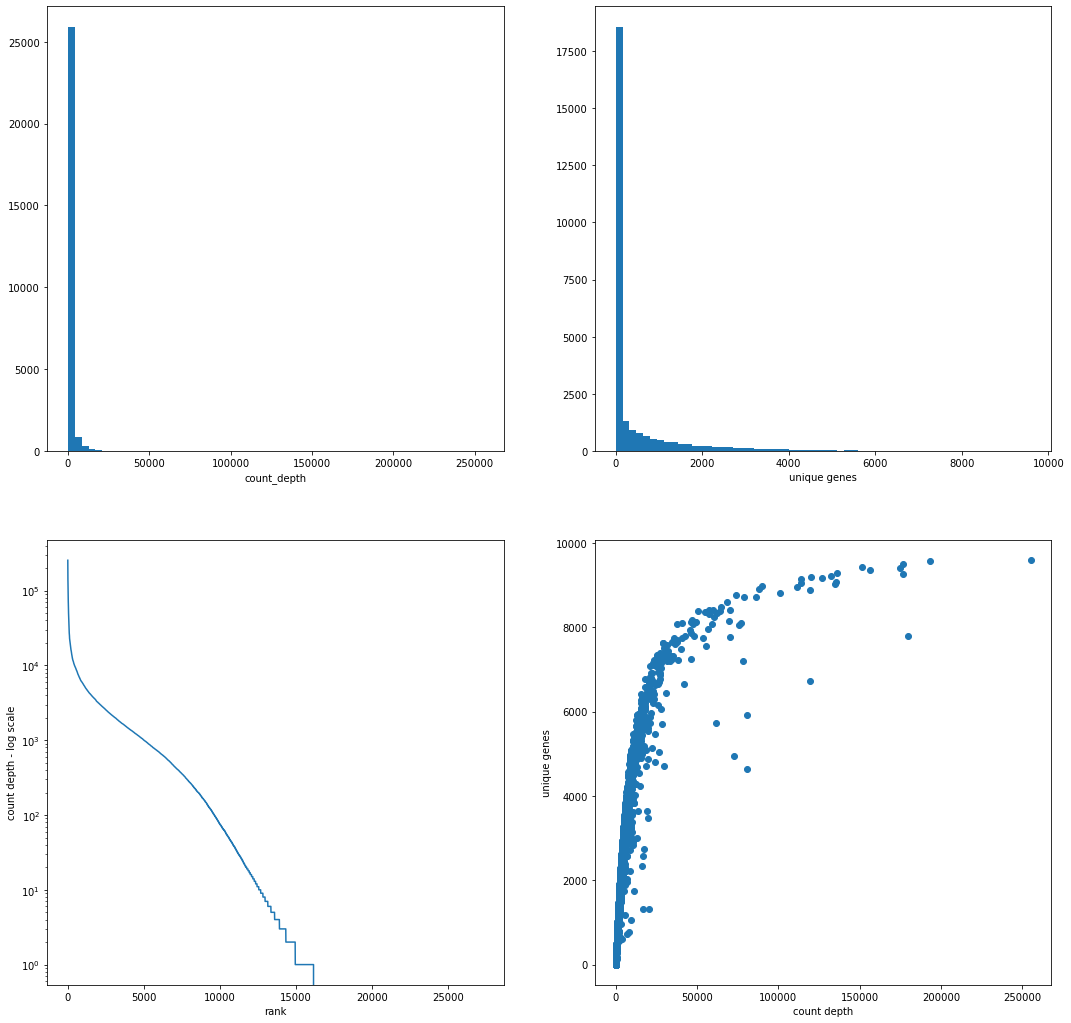

In [48]:
plt.rcParams["figure.figsize"] = [18,18]
fig, axs = plt.subplots(2, 2)
axs[0,0].hist(count_depth,bins=60)
#axs[0,0].set_yscale("log")
axs[0,0].set_xlabel("count_depth")

axs[0,1].hist(number_of_genes,bins=60)
#axs[0,1].set_yscale("log")
axs[0,1].set_xlabel("unique genes")

axs[1,0].plot(range(len(count_depth)),sorted(count_depth,reverse=True))
axs[1,0].set_yscale("log")
axs[1,0].set_xlabel("rank")
axs[1,0].set_ylabel("count depth - log scale")

axs[1,1].scatter(count_depth,number_of_genes)
axs[1,1].set_xlabel("count depth")
axs[1,1].set_ylabel("unique genes")

hi :)


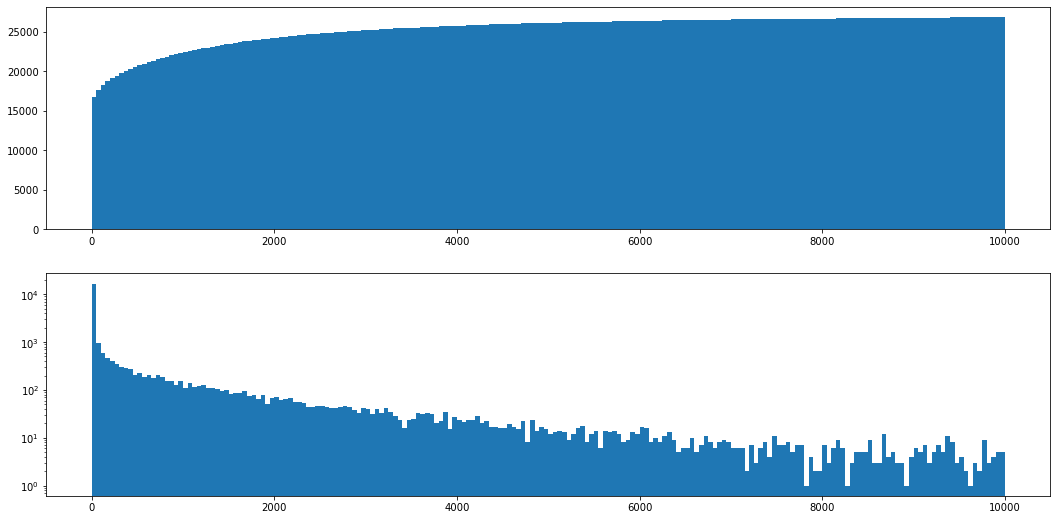

In [49]:
plt.rcParams["figure.figsize"] = [18,9]
fig2, axs2 = plt.subplots(2, 1)

mindepth = 0
maxdepth = 10000
mingenes = 0
maxgenes = 3000

axs2[0].hist(count_depth[np.where((count_depth <= maxdepth) & (count_depth >= mindepth))], bins=min([200,int(maxdepth/20)]),cumulative=True)
axs2[1].hist(count_depth[np.where((count_depth <= maxdepth) & (count_depth >= mindepth))], bins=min([200,int(maxdepth/20)]),cumulative=False)
#axs2[0].set_yscale("log")
#axs2[0].hist(count_depth[np.where((count_depth < maxdepth))], bins=21)

#axs2[1].hist(number_of_genes[np.where((number_of_genes<=maxgenes) & (number_of_genes >= mingenes))],bins=min([200,int(maxgenes/20)]),cumulative=True)
axs2[1].set_yscale("log")
#axs2[1].hist(number_of_genes[np.where((number_of_genes<maxgenes) )],bins=21)

print("hi :)")

I'll have to check how this dataset was collected, but it looks like these cells may already have been FACS sorted against some kind of live/dead stain prior to scRNA-seq, they are clean and missing populations with features characteristic of lysed cells


In [50]:
adata_filtered = copy.deepcopy(adata)
print(adata_filtered.X.shape)
sc.pp.filter_genes(adata_filtered, min_counts=1)
print(adata_filtered.X.shape)
sc.pp.filter_cells(adata_filtered, min_counts=1)
print(adata_filtered.X.shape)
sc.pp.filter_cells(adata_filtered, min_genes = 10)
print(adata_filtered.X.shape)

(27297, 10368)
(27297, 10368)
(16162, 10368)
(12584, 10368)
